* Todo -- linjeplott
* Scatterplott --
*
* kakediagram
* stolpediagram
* sns -- varianter



* Eksempler:
  1. Linjplot : Logistisk vekst når tar x igjen y -- Gini
  2. Histogram: Sparing 2 grupper
  3. Stolpe: Sparing eller lån
  4. Kakediagram: Gini/RIKE/FATTIGE
  5. Scatter: sparing / utdannelse
  6. 

# Pyplot
* Vi ser nøyere på plotting:
  - subplot
  - stolpediagram
  - kakediagram

## Subplot - Flere typer grafer/plot i samme figur
* Vi kan lage subplot med matplotlib
* Vi kaller da `plt.subplot(«antall rader», «antall kolonner», «plotnummer»)`

### Eksempel (Med curve_fit)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

tid_aar = list(range(2001,2024))
brukere = np.array([400e3, 796e3, 1.41e6, 2.48e6, 4.02e6,6.15e6,7.32e6,9.16e6,11.89e6,
           18.26e6,24.30e6,30.36e6,41.43e6,54.47e6,70.83e6,89.09e6,110.64e6,139.25e6,
           167.09e6,203.66e6,221.84e6,230.75e6,260.28e6])


[2.92637738e+08 3.85395201e-01]


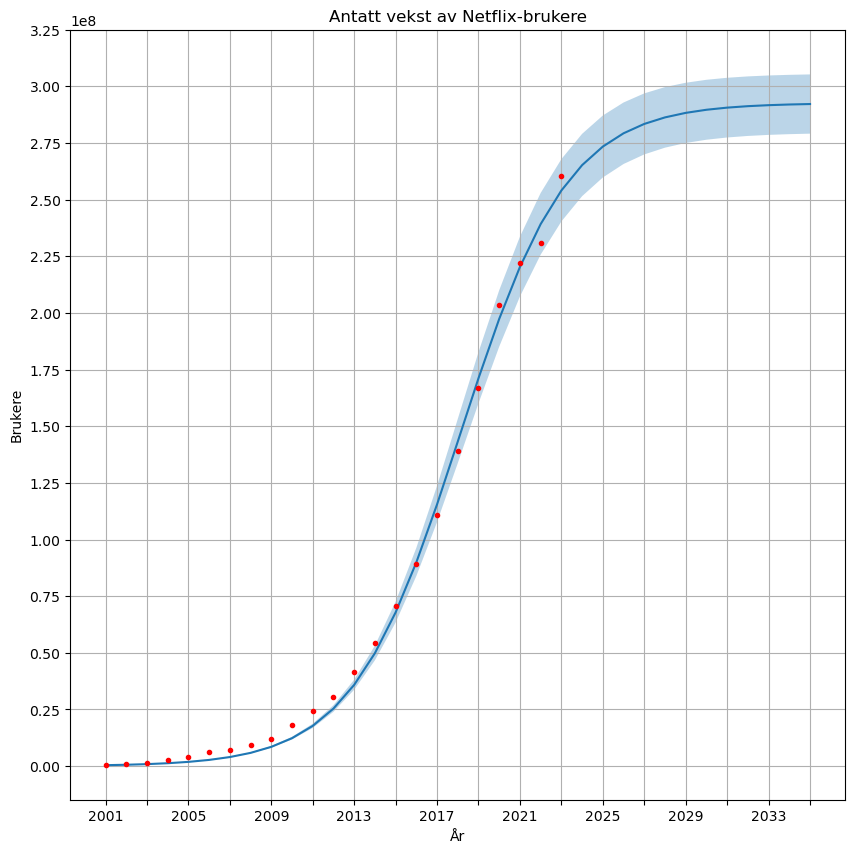

In [9]:
from scipy.optimize import curve_fit
from scipy.stats import norm

def logistic_function(t,K,r): #Merk at fri variabel t står først
    P0 = 400e3
    A = (K-P0)/P0
    return K/(1+A*np.exp(-r*t))


#tid må gå fra 0 ->
tid0 = np.linspace(0, len(brukere)-1, len(brukere))


def sjekkParametre():
    r = np.linspace(0.2,0.5,3)
    K = np.linspace(25e7, 40e7, 11)
    for Ki in K:
        plt.figure(figsize=(15,5))
        for i, ri in enumerate(r):
            plt.subplot(1,3,i+1)
            plt.plot(tid0, logistic_function(tid0,Ki,ri))
            plt.plot(tid0, brukere, 'o')
            plt.title(f"{Ki}, {ri}")
        plt.show()
    #K = 3.4e8, r=0.35 ser halvveis fornuftig ut

#sjekkParametre()


params, cov = curve_fit(logistic_function, tid0, brukere, p0=[3.4e8, 0.35])
print(params)
std = np.sqrt(np.diag(cov)) #Gir liste med standardavvik til parameterene
confidence_interval = norm.interval(0.98, loc=params, scale=std)
K_mean = params[0]
r_mean = params[1]
K_min = confidence_interval[0][0]
K_max = confidence_interval[1][0]
r_min = confidence_interval[0][1]
r_max = confidence_interval[1][1]

def logistic_function_errorbars(t):
    minst = logistic_function(t,K_min, r_min)
    maks = logistic_function(t,K_max, r_max)
    snitt = logistic_function(t,K_mean, r_mean)
    return [minst, snitt, maks]

tid = np.linspace(0,34,34+1)
brukere_fit = logistic_function_errorbars(tid)

plt.figure(figsize=(10,10))
plt.plot(tid, brukere_fit[1])
plt.fill_between(tid, brukere_fit[0], brukere_fit[2], alpha=0.3)
plt.plot(tid0, brukere, 'o', color='red', markersize=3)
plt.xlabel("År")
plt.ylabel("Brukere")
plt.grid()

xlokasjon = list(range(0,35,4))
start = 2001
xlabel = []
for loc in xlokasjon:
    xlabel.append(start+loc)


plt.xticks(ticks=xlokasjon, labels=xlabel)
plt.xticks(ticks=list(range(0,35,2)))
plt.yticks(ticks=np.arange(0,3.5e8, 0.25e8))
plt.title("Antatt vekst av Netflix-brukere")
plt.show()


**Studer nøye hvordan vi plottet figuren i forrige eksempel**

## Lånekalkulator: Stolpediagram og Kakediagram
* Tidligere lagde vi denne lånekalkulatoren

Hva er ønsket terminbelop? 1000


Gyldig terminbeløp gitt -- kalkulering fortsetter


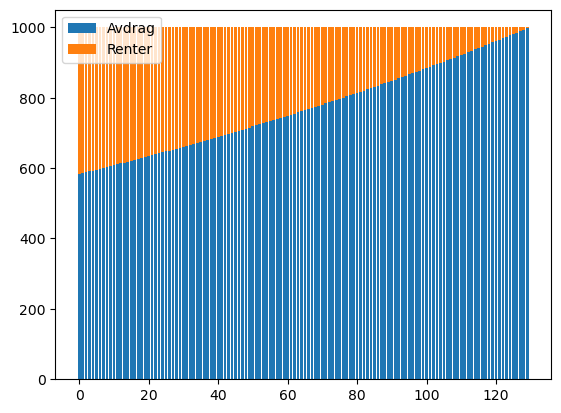

Nedbetalingstiden på 11 år og 10 måneder er for lenge
Renter [4837.334296557354, 4470.878725276828, 4085.674591480256, 3680.7626831267617, 3255.134713066989, 2807.730808267409, 2337.4368705785837, 1843.0818024753253, 1323.43459086045, 777.2012416704074]


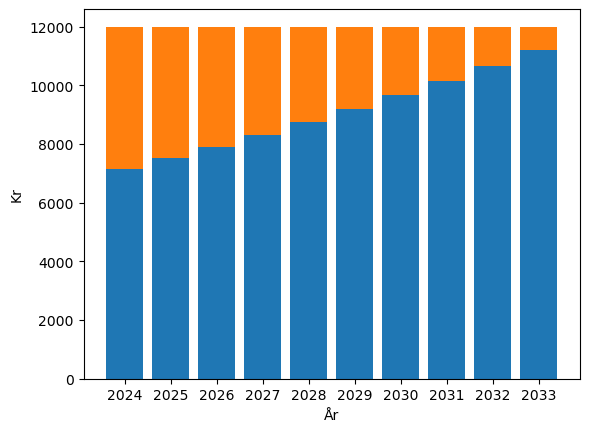

In [11]:
# Annuitetslån
import matplotlib.pyplot as plt

laan = 100000
rentesats = 0.05
terminbelop = float(input("Hva er ønsket terminbelop?"))
max_nedbetalingstid = 10 #år

def sjekk_terminbelop(terminbelop,r,L):
    renter = laan*rentesats/12
    if terminbelop<renter:
        print("Terminbeløpet på", terminbelop, "er for lite")
        print("Første renteavregning er på", renter, "kr")
        return False
    else:
        return True
    
if sjekk_terminbelop(terminbelop, rentesats, laan):
    print("Gyldig terminbeløp gitt -- kalkulering fortsetter")
    avdragsliste = []
    renteliste = []
    mnd = 0
    while laan > 0:
        renter = laan*rentesats/12
        avdrag = terminbelop-renter
        laan = laan - avdrag
        #laan -= termterminbelop
        renteliste.append(renter)
        avdragsliste.append(avdrag)
        mnd += 1
        #mnd = mnd +1

    tid_liste = list(range(mnd))

    plt.bar(tid_liste, avdragsliste, label="Avdrag")
    plt.bar(tid_liste, renteliste, label="Renter", bottom=avdragsliste)
    plt.legend()
    plt.show()
    
    if mnd/12 > max_nedbetalingstid:
        print(f"Nedbetalingstiden på {mnd/12:.0f} år og {mnd%12} måneder er for lenge")
    
    avdrag_aarlig = []
    renter_aarlig = []
    
    n_aar = mnd//12
    aar_liste = list(range(n_aar))
    
    for aar in aar_liste:
        avdrag = avdragsliste[aar*12:(aar+1)*12]
        renter = renteliste[aar*12:(aar+1)*12]
        avdrag_aarlig.append(sum(avdrag))
        renter_aarlig.append(sum(renter))
    
    print("Renter", renter_aarlig)
    
    startaar = 2024
    aarstall_liste = []
    for y in aar_liste:
        aarstall = f"{startaar+y}"
        aarstall_liste.append(aarstall)
        
    plt.bar(aarstall_liste, avdrag_aarlig, label="Avdrag")
    plt.bar(aarstall_liste, renter_aarlig, label="Renter", bottom=avdrag_aarlig)
    plt.xlabel("År")
    plt.ylabel("Kr")
    plt.show()
    
    
else:
    print("Ugyldig terminbeløp gitt -- programmet stopper")






* Den kan vi jobbe mer med

Gyldig terminbeløp gitt -- kalkulering fortsetter
Nedbetalingstiden på 6 år og 6 måneder er OK
Gyldig nedbetalingstid
Siste avddrag 394.9224071787994


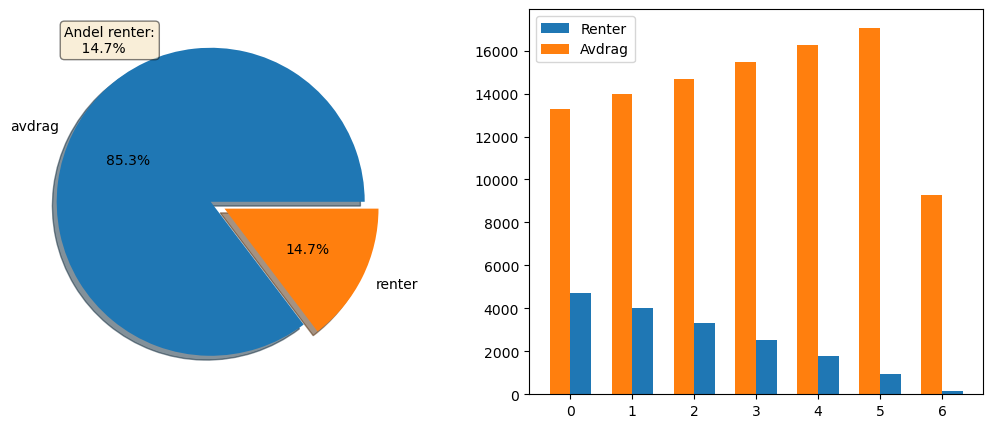

In [12]:
# Annuitetslån
import matplotlib.pyplot as plt
import numpy as np

laan = 100000
rentesats = 0.05
#terminbelop = float(input("Hva er ønsket terminbelop?"))
terminbelop = 1500.0
max_nedbetalingstid = 10 #år

def sjekk_terminbelop(terminbelop,r,L):
    renter = laan*rentesats/12
    if terminbelop<renter:
        print("Terminbeløpet på", terminbelop, "er for lite")
        print("Første renteavregning er på", renter, "kr")
        return False
    else:
        return True

def beregn_nedbetalingsplan(terminbelop, rentesats, laan):
    avdragsliste = []
    renteliste = []
    mnd = 0
    opprinnelig_laan = laan
    while laan > 0:
        renter = laan*rentesats/12
        avdrag = terminbelop-renter
        laan = laan - avdrag
        #laan -= termterminbelop
        renteliste.append(renter)
        avdragsliste.append(avdrag)
        mnd += 1

    tid_liste = list(range(mnd))
    return {"avdrag": avdragsliste, "renter": renteliste, "tid": tid_liste, "laan_tot": opprinnelig_laan}

def sjekkNedbetalingstid(laanedata):
    antall_mnd = laanedata["tid"][-1]
    if antall_mnd/12 >max_nedbetalingstid:
        print(f"Nedbetalingstiden på {antall_mnd:.0f} år og {antall_mnd%12} måneder er for lenge")
        return False
    print(f"Nedbetalingstiden på {antall_mnd/12:.0f} år og {antall_mnd%12} måneder er OK")
    return True
        

def fremstill_resultat(data):
    totale_avdrag = sum(data["avdrag"])
    avdrag = data["avdrag"]
    renter = data["renter"]
    tid = data["tid"]
    avdrag[-1] -= totale_avdrag-data["laan_tot"]

    
    print("Siste avddrag", data["avdrag"][-1])

    totale_renter = sum(data["renter"])


    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)

    plt.pie([totale_avdrag, totale_renter], 
            labels=["avdrag", "renter"],
            explode=[0,0.1], shadow=True, autopct='%1.1f%%'
           )

    
    box = {"boxstyle": 'round', "facecolor":"wheat", "alpha": 0.5}
    tekst = f"""Andel renter:
    {totale_renter/(totale_avdrag+totale_renter):.1%}"""
    
    plt.text(-0.95,0.95,tekst,
             bbox=box,
             verticalalignment='bottom'
            )

    avdrag_pa = []
    renter_pa = []
    for y in range(0,len(tid),12):
        avdrag_y = sum(avdrag[y:y+12])
        renter_y = sum(renter[y:y+12])
        avdrag_pa.append(avdrag_y)
        renter_pa.append(renter_y)

    yrs = np.array(range(len(avdrag_pa)))
    bredde = 1/3

    plt.subplot(1,2,2)
    plt.bar(yrs+bredde/2, renter_pa,width=bredde, label="Renter")
    plt.bar(yrs-bredde/2, avdrag_pa, width=bredde, label="Avdrag")
    plt.legend()
    plt.subplots_adjust(left=0, right=1)

    plt.show()     




if sjekk_terminbelop(terminbelop, rentesats, laan):
    print("Gyldig terminbeløp gitt -- kalkulering fortsetter")
    data = beregn_nedbetalingsplan(terminbelop, rentesats, laan)
    if sjekkNedbetalingstid(data):
        print("Gyldig nedbetalingstid")
        fremstill_resultat(data)
    else:
        print("Ugyldig nedbetalingstid")    
else:
    print("Ugyldig terminbeløp gitt -- programmet stopper")






# Histogram

Listen inneholder data om 2000 kunder.
For hver kunde har vi data om ['fornavn', 'etternavn', 'startsaldo']


In [1]:
import json
with open("kundedata1.json", 'r') as file:
    kundedata = json.load(file)
info = f"""Listen inneholder data om {len(kundedata)} kunder.
For hver kunde har vi data om {list(kundedata[0].keys())}"""
print(info)


import random

formue_liste  = []
for kunde in kundedata:
    del kunde["startsaldo"]
    kunde["utdanning_tid"] = 9+random.random()*11
    formue_snitt = 200e3+100e3*kunde["utdanning_tid"]
    kunde["formue"] = random.gauss(mu=formue_snitt, sigma=500e3)
    formue_liste.append(kunde["formue"])

plt.hist(formue_liste, bins=30, histtype="step")
plt.show()

mye_utdanning_grense = 17
lite_utdanning = []
mye_utdanning = []
for kunde in kundedata:
    if kunde["utdanning_tid"]>= mye_utdanning_grense:
        mye_utdanning.append(kunde["formue"])
    else:
        lite_utdanning.append(kunde["formue"])

plt.hist([mye_utdanning, lite_utdanning], histtype="step", stacked=False, label=["Mye", "Lite"], density=False, bins=30)
plt.legend()
#plt.hist(lite_utdanning, histtype="step", stacked=True)
plt.show()

plt.hist(mye_utdanning, alpha=0.5, label="Mye utdanning", density=True, bins=30)
plt.hist(lite_utdanning, alpha=0.5, label="Lite utdanning", density=True, bins=30)
plt.legend()
plt.show()

Listen inneholder data om 2000 kunder.
For hver kunde har vi data om ['fornavn', 'etternavn', 'startsaldo']


NameError: name 'plt' is not defined